In [8]:
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os

if torch.backends.mps.is_built():
    device='mps'

In [9]:
class vibrationData(Dataset):
    def __init__(self, root_path, transform=None):
        self.transform = transform
        self.class_list = os.listdir(os.path.join(root_path, 'converted'))
        self.dataset = []
        
        for folder in self.class_list:
            if folder =='.DS_Store':
                continue
            #1 . signal data load
            x = []
            y = []

            x_txt = os.path.join(root_path, 'signal', folder, 'x_data.txt')
            y_txt = os.path.join(root_path, 'signal', folder, 'y_data.txt')

            with open(x_txt, 'r') as f:
                lines = f.readlines()
                x = []
                for line in lines:
                    x.append(line.strip())
            with open(y_txt, 'r') as f:
                lines = f.readlines()
                y = []
                for line in lines:
                    y.append(line.strip())


            #2. img data load
            wavlet_imgs = []
            corr_imgs = []

            img_dir = os.path.join(root_path, 'converted', folder)
            imgs = os.listdir(img_dir)

            dataset = []
            for idx in range(0, 5121024, 1024):
                
                wavlet = os.path.join(img_dir, f'wavelet_{idx+1024}.png')
                corr = os.path.join(img_dir, f'correlation_{idx+1024}.png')
                
                if not os.path.isfile(wavlet):
                    print(f'No such file {wavlet}')
                    exit()
                if not os.path.isfile(corr):
                    print(f'No such file {corr}')
                    exit()
                
                x_sample = x[idx:idx+1024]
                y_sample = y[idx:idx+1024]
                
                data ={
                    'x' : x_sample,
                    'y' : y_sample,
                    'wavlet' : wavlet,
                    'corr' : corr,
                    'cls' : folder
                }
                
                dataset.append(data)
            
            self.dataset +=dataset    
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        data = self.dataset[idx]
        
        x = data['x']
        y = data['y']
        cls = data['cls']
        wavlet = data['wavlet']
        corr = data['corr']
        
        signal = [x, y]
        wavlet_img = Image.open(wavlet)
        corr_img = Image.open(corr)
        if self.transform:
            wavlet_img = self.transform(wavlet_img)
            corr_img = self.transform(corr_img)
        
        return signal, wavlet_img, corr_img, cls

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5, ))
])

In [11]:
root_path = os.path.join(os.getcwd(), 'data')
dataset = vibrationData(root_path=root_path)

In [21]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

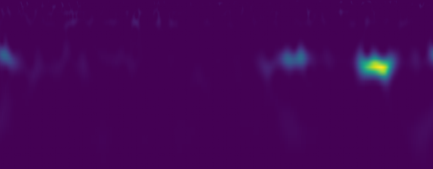

In [51]:
dataset[1004][1]

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.layers = nn.Sequential(
            
        )
    
    def forward(self, x):
        return self.layers(x)      